 # Generate Figure for supplement that demonstrates the effectiveness of telluric corrections

This should make the figure that compares the "comparison" star spectrum both with and without telluric corrections to the sample K7 template spectrum to demonstrate that our telluric corrections are adequate for measuring potassium in J1644 and J2356

In [1]:
from __future__ import print_function


import matplotlib
#matplotlib.use('pdf')
    

import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from astropy.io import fits
from glob import glob
from astropy.time import Time
from astropy import coordinates as coords
from astropy import units as u
from astropy import constants as const
from astropy import convolution as conv
from astropy.table import Table, Column
import scipy.interpolate as scinterp
import time
start = time.time()

import spec_plot_tools as spt
import cal_params as cp
import plot_spec as ps
print(os.getcwd())



no file_setting specificied


/Users/BenKaiser/Desktop/abd1714_Kaiser_et_al_2020_Science


In [2]:
plt.show()

In [3]:
figure_output_dir='/Users/BenKaiser/Desktop/GaiaJ1644m0449_paper/First_Revision/figures'

In [4]:
target_dir= '/Users/BenKaiser/Desktop/GaiaJ1644m0449_paper/'
os.chdir(target_dir)

In [5]:
comp_tellcorr_file= "ravg_fwctb.GaiaJ1644m0449other_20190825_tellcorr_400m2.fits"
comp_nocorr_file="ravg_fwctb.GaiaJ1644m0449other_20190825_400m2.fits"
sdss_path = '/Users/BenKaiser/Desktop/SDSS_speclib/'
#sdss_name='M0_-0.5_Dwarf.fits'
sdss_name='K7_+0.0_Dwarf.fits'
sdss_label='K7 Template'
sdss_name=sdss_path+sdss_name
comp_tellcorr_file=target_dir+comp_tellcorr_file
comp_nocorr_file=target_dir+comp_nocorr_file

In [6]:
sdss_spec, sdss_header, sdss_noise= spt.retrieve_sdss_spec(sdss_name)

wavelengths.min:  3650.0496
new_wavelengths.min(): 3649.0096496361098


In [7]:
print(comp_tellcorr_file)
print(comp_nocorr_file)
comp_tellcorr_spec, comp_tellcorr_header, anoise= spt.retrieve_spec(comp_tellcorr_file)
comp_nocorr_spec, comp_nocorr_header, bnoise= spt.retrieve_spec(comp_nocorr_file)

/Users/BenKaiser/Desktop/GaiaJ1644m0449_paper/ravg_fwctb.GaiaJ1644m0449other_20190825_tellcorr_400m2.fits
/Users/BenKaiser/Desktop/GaiaJ1644m0449_paper/ravg_fwctb.GaiaJ1644m0449other_20190825_400m2.fits


In [8]:
norm_range=[6000,6100]
#norm_range=[7470, 7530]
obs_pix_width=5
kernel='box'
sdss_scale_factor= 20.6 #actually the scale factor for BOSS

In [11]:
#sm_comp_tellcorr_spec= ps.convolve_spectrum(comp_tellcorr_spec, comp_tellcorr_header, kernel_type=kernel, pix_width=obs_pix_width)
#sm_comp_nocorr_spec= ps.convolve_spectrum(comp_nocorr_spec, comp_nocorr_header, kernel_type=kernel, pix_width=obs_pix_width)
sm_sdss_spec= ps.convolve_spectrum(sdss_spec, comp_tellcorr_header, kernel_type='sdss_match',pix_width=1)

#sm_sdss_spec=ps.convolve_spectrum(sm_sdss_spec,comp_tellcorr_header, kernel_type=kernel, pix_width=obs_pix_width*sdss_scale_factor)



sm_comp_tellcorr_spec=np.copy(comp_tellcorr_spec)
sm_comp_nocorr_spec=np.copy(comp_nocorr_spec)
#sm_sdss_spec=np.copy(sdss_spec)


sm_comp_tellcorr_spec= ps.norm_spectrum(sm_comp_tellcorr_spec, norm_range, show_norm_range=False)
sm_comp_nocorr_spec= ps.norm_spectrum(sm_comp_nocorr_spec, norm_range, show_norm_range=False)
sm_sdss_spec= ps.norm_spectrum(sm_sdss_spec, norm_range, show_norm_range=False)

sdss_see_sig 0.9907997169143666
see_sig 1.878981688210224
conv_see_sig 1.5965237566637567


wavelength-based norm range selected [6000, 6100]





wavelength-based norm range selected [6000, 6100]





wavelength-based norm range selected [6000, 6100]





/Users/BenKaiser/Desktop/GaiaJ1644m0449_paper/First_Revision/figures
/Users/BenKaiser/Desktop/GaiaJ1644m0449_paper/First_Revision/figures
1600036824.503565


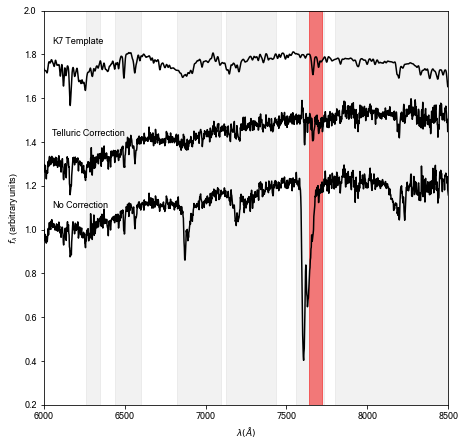

In [12]:
spt.initiate_science_plot()
fig= plt.figure(figsize=(7.25,7.25))
highlight_range=[7640,7720]
label_pos=3.3
label_off=65
x_pos= 6050
y_pos= 1.1
v_offset=0.3

plt.axvspan(highlight_range[0], highlight_range[1], alpha=0.5, color='r')


plt.plot(sm_comp_nocorr_spec[0],sm_comp_nocorr_spec[1],  color='k')
plt.plot(sm_comp_tellcorr_spec[0],sm_comp_tellcorr_spec[1]+v_offset, color='k')
plt.plot(sm_sdss_spec[0],sm_sdss_spec[1]+2.5*v_offset, color='k')

plt.text(x_pos, y_pos, 'No Correction', color='k')
plt.text(x_pos, y_pos+1.1*v_offset, 'Telluric Correction', color='k')
plt.text(x_pos, y_pos+2.5*v_offset, sdss_label, color='k')






#plt.xlim(np.nanmin(sm_M0729_spec[0]), np.nanmax([sm_M0703_spec[0], sm_M0825_spec[0]]))
plt.xlim(6000, 8500)
plt.ylabel(r'$f_{\lambda}$ (arbitrary units)')
plt.xlabel(r'$\lambda(\AA)$')
plt.ylim(0.2,2)
spt.show_plot(line_id='', show_legend=False,actually_show=False)

print(os.getcwd())
os.chdir(figure_output_dir)
print(os.getcwd())
start = time.time()
print(start)
time_string=str(start).split('.')[0]

#plt.legend(loc='lower right')
#plt.savefig('figure_tellcorr_'+time_string+'.pdf')#plt.grid(True)

plt.show()